# **Homework 1**
---

### ***Importing the Necessary Tools***
---

In [1]:
# Import reading tools for the csv file
import pandas as pd                                # Used for importing data sets
import numpy as np                                 # Importing numpy tools
import matplotlib.pyplot as plt                    # Creating scatter plots to visualize data
from scipy import stats                            # Allowing the creation of stastistic symbols and equations for linear algebra
from tqdm import tqdm                              # Showing a progress bar

import time                                        # Providing limits on how long a loop runs when processing the data
from sklearn.neighbors import KNeighborsClassifier # Import the tools to point out the proximity between different clusters and displaying the predictions as a graph

### ***Reading the CSV File***
---
The most common structure to read files from in a Jupyter Notebook is the CSV extension. Short for Comma-Seperated Values, CSV is used to organize data points in a file into a table-like format similar to that of Microsoft Excel. This makes the file contents easier to view, organize, and even edit with programming languages like Python or C++.

---

In [2]:
# Import csv image 
training = pd.read_csv('/home/alex_king_bailey/Files/Data/mnist_train.csv') # Bring mnist training data from designated file path
testing = pd.read_csv("~/Files/Data/mnist_test.csv")[:10]                        # Bring mnist testing data from designated file path

In [3]:
training # Display the data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
testing # Display the data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The reason why there are so many zeroes in both tables is because they represent negative data. Both MNIST data sets are visualizations of hand-drawn text. Any time a number higher than zero is found on either table, it indicates a pixel or component of the actual letter drawn in each data set.

---

### ***Converting the Data into Arrays***
---

In [5]:
np.array(training) # Change the depiction of the data into a python list for data processing

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]])

In [6]:
np.array(testing) # Change the depiction of the data into a python list for data processing

array([[7, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

---

### ***Dataset Shapes***
---
To interpret a dataset's 'shape' is to measure how many columns are in the CSV file and how many rows there are in proportion. The shape is depicted similar graph coordinate. The number of rows is represented by the first number, similar to placement on the x-axis while the number of columns is represented by the second integer, similar to a point's placement on the y-axis.

---

In [7]:
print(np.shape(training)) # 60000 rows and 785 columns

(60000, 785)


In [8]:
print(np.shape(testing)) # 100000 rows and 785 columns

(10, 785)


---

### ***Building a classifier with KNN***
---
The process begins with 

---

In [15]:
training_array = np.array(training) # Assign a variable to the training data as an array
testing_array = np.array(testing)   # Assign a variable to the testing data as an array

In [16]:
def distance(x1,x2):                                # Consolidating the process of KNN into a single function
    return np.sum((np.sum([x1, -x2], axis=0) ** 2))  

In [17]:
score_A = 0                                                                        # The score variable must be used to evaluate how accurate the proximity between clusters really is
total_A = 0                                                                        # A way of quantifying how many clusters are found during the allotted start and end time

start = time.time()                                                                # Setting a parameter for at what point the classifier activates

for y in tqdm(testing_array):                                                      # Measure the progress of the for-loop executing upon the testing array's columns
    distances = []                                                                 # Start the loop with no columns already marked in the program
    answer = y[0]
    total_A += 1                                                                   # With each new cluster measurement discovered, add it to the assigned variable as a single integer
    
    for x in training_array:
        distances.append(distance(x[:], y))                                         # Measure the progress of the for-loop executing upon the training array's rows
    if answer == stats.mode(training_array[np.argsort(distances)[1:5]].T[0])[0][0]: # Display an estimated time of completion for the tqdm progress lines as the training array is reorganized and scored
        score_A += 1                                                                # With each row sorted and added to the distances list, add it to the score_A variable as a single integer

end = time.time()                                                                   # Setting a limit for at what the classifier stops running

print(score_Sci / i)                                                                # Divide the final amount of clusters found by the index the program stopped at
print(end - start)                                                                  # State the total amount of time the entire program took to run

100%|██████████| 10/10 [00:14<00:00,  1.43s/it]

0.0
14.314622163772583


In [18]:
from sklearn.neighbors import KNeighborsClassifier      # Import the tools to point out the proximity between different clusters and displaying the predictions as a graph
model_knn = KNeighborsClassifier(n_neighbors=5)         # Looking for at least 5 clusters that are close together
model_knn.fit(training_array[:,1:],training_array[:,0]) # Arrange the MNIST training array into a KNN model to start looking for cluster proximities

KNeighborsClassifier()

In [20]:
score_Sci = 0                                                            # Assigning the final accuracy of the KNN model to a variable            
i = 1                                                                    # Setting an index for which both elements of the loop can start at
start = time.time()

while i < np.shape(testing_array)[0]:                                    # 
    if model_knn.predict([testing_array[i][1:]]) == testing_array[i][0]: #
        score_Sci+=1
        
    end = time.time()
    
    if i%100 == 0:
        print(i, "@", end - start, "Current score:", score_Sci / i) # Stop the loop when the index reaches 100, then divide the 
        
    i+=1
end = time.time()

print("Score", score_Sci / i)
print("It took", end - start)
        

Score 0.9
It took 1.9600167274475098


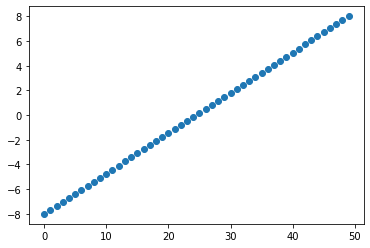

In [21]:
plt.scatter(np.arange(50), np.linspace(-8,8,50))

---